# Laboratoire d'apprentissage machine 3: Outils d'apprentissages

Ce laboratoire vise à vous initier aux méthodes d'apprentissage machine. Ce laboratoire sera séparé en trois sections.

La première section est la section théorique. Bien que nous n'allons pas entrer dans les détails des méthodes d'apprentissage, une base théorique permettant de comprendre le contexte d'utilisation des algorithmes d'apprentissage machine vous sera montré en trois sous-sections qui cherchent à répondre aux questions suivantes:
1. Qu'est-ce qu'est l'apprentissage machine et pourquoi on l'utilise?
2. Quels sont les outils utilisés pour effectuer l'apprentissage machine?
3. Comment évalué la qualité des résultats obtenus par apprentissage machine?

La seconde section est la section d'exemple pratique. Cette section présente un exemple détaillé d'apprentissage pour un problème de régression et un problème de classification.

La dernière section est la section d'évaluation, où des manipulations seront exigées et où vous aurez à répondre à des questions. Les points associé à chaque manipulation ou question est indiqué dans l'énoncé, pour un total de 20 points.

## Théorie

### Définition et utilisation

L'apprentissage machine est une discipline faisant partie de la famille de l'intelligence artificielle. Elle a pour but de développer un modèle de prédiction en fournissant un grand volume de données à une machine. Il existe une multitude d'algorithmes arrivant à ces fins. Il existe deux catégories principales d'apprentissage:
1. Apprentissage supervisé: L'algorithme utilise une base de données contenant la réponse à ses prédictions lors de son apprentissage (la phase d'apprentissage est appelée entraînement). Il compare les résultats obtenus par ses prédictions avec les données de la base de données et s'ajuste en conséquence.
2. Apprentissage non supervisé: L'algorithme cherche des liens et des tendances entre les différents échantillons de la base de données lors de l'entraînement. Il définit alors des catégories permettant de regrouper les entrées similaires.

Lors de ce laboratoire, nous allons nous concentrer sur l'apprentissage supervisé. Il est à noter que les deux catégories sont complémentaires et ne peuvent pas être utilisées pour les mêmes problèmes. L'apprentissage supervisé est utilisé lorsque l'on **sait** ce qu'on veut prédire. L'apprentissage non supervisé est utilisé pour regrouper des entrées et extraire des profils qu'on ne connait pas à priori.

Maintenant que nous avons clarifié ce qu'est l'apprentissage supervisé, nous allons voir comment il s'utilise. Tout d'abord, il faut comprendre qu'il y a deux phases à l'algorithme:
1. L'entraînement: Dans cette phase, on fournit à l'algorithme beaucoup de données avec la réponse aux prédictions. L'algorithme **apprend** de la base de données.
2. La production: En production, l'algorithme n'apprend plus. On lui fournit des données, et il ressort des prédictions.

Lorsque l'on définit un problème d'apprentissage, il faut déterminer quelles informations sont disponibles à priori, puis ce qu'on veut déterminer. Par la suite, il faut construire une base de données ayant de l'information permettant d'avoir la réponse aux prédictions. 
Pour simplifier les choses, prenons l'exemple de l'ensemble de données `iris` vu lors de la dernière séance. Dans ce cas, on veut déterminer quelle est l'espèce d'iris, en fonction des dimensions des pétales et des sépales. Pour construire la base de données, des experts ont surement été déployés afin d'établir l'espèce en utilisant leur expérience et/ou de l'information difficile à mesurer (ex: fragrance). Une fois la base de données construite, c'est le moment de l'apprentissage. Habituellement, plusieurs méthodes sont évaluées et comparées afin de déterminer celle qui a les meilleures performances. Une fois l'entraînement terminé, on peut maintenant utiliser l'algorithme en production. Il va suffire de fournir les dimensions des pétales et sépales afin d'identifier l'espèce d'iris.

La figure suivante illustre le processus d'apprentissage dans le cas supervisé.

![Apprentissage supervisé](ML_entrainement.png)



### Outils

Plusieurs outils sont disponibles avec python afin d'entraîner et d'exécuter les algorithmes d'apprentissage machine. Le plus connu, grâce à son aisance d'utilisation, sa large gamme d'algorithmes et son excellente documentation est scikit-learn. C'est cette librairie que nous allons utiliser lors de ce laboratoire. En tout temps, vous pouvez consulter la [documentation](https://scikit-learn.org/stable/) pour plus de détails. 

La première action à effectuer, avec un jeu de données nettoyé et analysé, est de séparer aléatoirement le jeu de données en 2 ou 3 différents ensembles soit:
1. L'ensemble d'entraînement: Partie du jeu de données utilisé pour l'apprentissage en tant que tel. Habituellement entre 60% et 80% du total. 
2. L'ensemble de test: Partie du jeu de données utilisé afin de déterminer les performances des différents algorithmes d'apprentissage et les comparer. Habituellement entre 15% et 30 %
3. L'ensemble de validation: Permet de valider la solution retenue. Il est facultatif, mais surtout utile lorsque l'on ajuste beaucoup les hyperparamètres. Habituellement entre 10% et 20%.

Mais si les données sont si précieuses, pourquoi on ne les utilisent pas toutes pour faire l'entraînement? C'est parce qu'il existe un phénomène appelé surapprentissage ou "overfitting". Cela se produit lorsque l'algorithme est tellement familier avec le jeu de donnée utilisé lors de l'entraînement qu'il modélise, non seulement les tendances réelles, mais aussi les anomalies du jeu de données. Cela se traduit par des excellantes pérdictions sur les données d'entraînement, mais de piètres performances sur les autres jeux de données. C'est pourquoi les données de tests sont utilisées pour déterminer les performances; on utilise des données que l'algorithme n'a pas utilisées pour apprendre.

Mais pourquoi les données de validation alors? Pour optimiser les performances, des tests automatiques optimisant les paramètres des algorithmes choisis (aussi appelé hyperparamètres) peuvent être utilisés. Dans ce cas il est possible que ces paramètres soient optimums spécifiquement pour les données de tests, puisqu'ils ont été utilisés pour l'optimisation. Les données tests permettent donc d'avoir des résultats de performance plus réaliste. Bref, si l'on utilise des données afin d'ajuster l'algorithme, la performance sur ces données sera biaisée. **Dans le cadre de ce laboratoire, nous n'allons pas utiliser les données de validation**

Pour en revenir à scikit-learn, la librairie possède une fonction permettant de faire la spéparation des données. Elle est utilisée comme suit:

```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
```
Il est à noter que l'on sépare les données d'entré (X) de la variable que l'on veut prédire. Il est aussi important de fixer le "random_state" afin d'avoir des résultats reproductibles.

La seconde étape est de choisir un algorithme. Pour trouver un algorithme, vous pouvez consulter [cette page](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). Il suffit alors de déclarer l'objet de scikit-learn qui lui correspond.

```
clf = classifier_class(args)
```
Où `classifier_class` est la classe de l'algorithme choisi et args sont les arguments pour l'initalisation de l'objet.

Pour faire l'entraînement, les méthodes sont standadisées. Il suffit de faire:

```
clf.fit(X_train, y_train)
```

C'est aussi simple que ça! Pour utiliser le modèle, il suffit de faire:

```
clf.predict(an_input)
```


### Évaluation du modèle

Une fois le modèle entraîné, il est nécessaire d'évaluer ses performances. 


#### Régression

Une métrique très simple, mais très utilisée pour la régression est l'erreur quadratique moyenne. Comme son nom l'indique, elle est obtenue en effectuant la moyenne du carré de toutes les erreurs de prédictions. Il existe plusieurs autres métriques pour la régression, mais allons nous limiter à cette métrique dans le cadre du laboratoire. Cette métrique peut directement être retrouvée avec une méthode de scikit-learn:

```
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)
```

#### Classification

Une visualisation fondemmentale utilisée dans le cadre des problèmes de classification, en particulier les problèmes de classification binaires, est la matrice de confusion.
Cette matrice met en relation la valeur des prédictions avec la valeur réelle des échantillons. Lorsque la prédiction est la même valeur que la valeur réelle, on dit que la prédiction est "vrai" dans le cas contraire, elle est "fausse". On dit aussi qu'un échantillon est "positif" si la classe prédite correspond à celle évalué. Dans le cas contraire, l'échantillon est considéré "négatif". Donc, pour une matrice de corrélation binaire, on a la nomentlature suivante:

In [139]:
import numpy as np
np.matrix([['Vrai négatif', 'Faux positif'], ['Faux négatif', 'Vrai positif']])

matrix([['Vrai négatif', 'Faux positif'],
        ['Faux négatif', 'Vrai positif']], dtype='<U12')

Cette nomenclature aide à définir d'autres critères de performances très importants en classification soit:
1. Précision: Ratio des vrais positifs sur l'ensemble des prédictions positives. À favoriser lorsque l'on veut que ce qu'on a prédit comme positif est vrai, même si certains échantillons vrais sont mal classifiés. Ex: Si on veut déterminer les bons restaurants à visiter dans un quartier. Dans ce cas, on préfère que tous les restaurants sélectionnés soient bons. Ce n'est pas problématiques si certains bons restaurents sont mals identifiés.
2. Rappel: Ratio des vrais positifs sur l'ensemble des échantillons vrais. À favoriser lorsque l'on veut prédire comme positif tous les échantillons vrais, même si des échantillons faux sont considérés positifs. Ex: Détection de masses cancéreuses. Dans ce cas, on préfère largement avoir des faux positifs que de passer à côté de résultats positifs. 
3. F-score: Métrique hybride entre la précision et le rappel ([voir ici pour le calcul](https://en.wikipedia.org/wiki/F-score)). Habituellement, la métrique F1 est utilisée, mais une forme générique F_beta peut être utilisée en augmentant (favorise le rappel) ou diminuant (favorise la précision) un paramètre beta.

Il est possible de générer ces métriques grâces à la fonction `classification_report`, et les matrices de confusions avec `confusion_matrix` et `ConfusionMatrixDisplay`.

Ces métriques sont difficiles à interpréter, car leur interprétation dépend grandement du contexte. Afin de fournir une référence de performance, les `DummyClassifier` de *scikit_learn* peuvent être utilisés. Ces objets utilisent une règle très simple, telle que tout prédire comme positif. Ils possèdent les mêmes méthodes que d'autres algorithmes de classification, ils peuvent donc être entraînés avec les mêmes données et produire des rapports de performances.

## Exemples

In [140]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

### Régression

Pour la régression, nous allons utiliser le dataset boston vu au dernier laboratoire. Nous allons essayer de prédire la vairable MEDV, qui représente la valeur medianne des propriétés en milliers de dollards. 

In [141]:
# Import de boston
boston_raw = datasets.load_boston()

data = np.c_[boston_raw['data'], boston_raw['target']]
column_name = list(boston_raw['feature_names']) + ['MEDV']
boston = pd.DataFrame(data, columns=column_name)

boston['CHAS'] = boston['CHAS'].apply(int)
boston['AGE'] = boston['AGE'].apply(round)
boston['RAD'] = boston['RAD'].apply(int)

boston.head()

c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,79,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,46,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222.0,18.7,396.90,5.33,36.2


Nous allons utiliser une des méthodes de régression les plus simples, soit la régression linéaire. Cette méthode trouve la fonction linéaire modélisant le problème qui minimise le carré des erreurs.

In [142]:
# On fait la séparation des données
X_train, X_test, y_train, y_test = train_test_split(boston.drop('MEDV', axis='columns'), boston['MEDV'], test_size = 0.3, random_state = 1)
# On définit notre méthode de régression
reg = LinearRegression()

# On entraîne le modèle avec les données d'entraînement
reg_train = reg.fit(X_train, y_train)

# On génère un exemple
print('Pour le premier échantillon, on prédit:{}'.format(reg_train.predict(X_test)[150]))
print('Pour le premier échantillon a la valeur mesurée de :{}'.format(y_test.iloc[150]))

#On génère l'erreur quadratique moyenne avec les données de test
print('Erreur quadratique moyenne des prédiction: {}'.format(mean_squared_error(y_test, reg_train.predict(X_test))))

# On compare avec un dummy_regressor
print('Erreur quadratique par rapport à la valeur moyenne: {}'.format(mean_squared_error(y_test, np.full(y_test.shape, y_test.mean()))))

Pour le premier échantillon, on prédit:33.69969463482671
Pour le premier échantillon a la valeur mesurée de :33.8
Erreur quadratique moyenne des prédiction: 19.832108686597035
Erreur quadratique par rapport à la valeur moyenne: 91.65448710180056


c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


### Classification

Pour la classification, nous allons utiliser le dataset iris vu au dernier lab pour déterminer l'espèce, soit la colonne "target".

In [143]:
# Import de iris
iris_raw = datasets.load_iris()

data = np.c_[iris_raw['data'], iris_raw['target']]
column_name = iris_raw['feature_names'] + ['target']
iris = pd.DataFrame(data, columns=column_name)

iris['target'] = iris['target'].apply(int)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


*Explication sommaire de KNN*

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



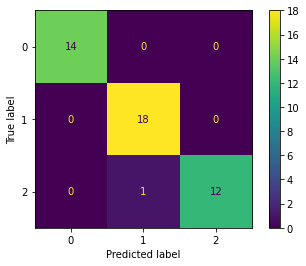

In [144]:
# On fait la séparation des données
X_train, X_test, y_train, y_test = train_test_split(iris.drop('target', axis='columns'), iris['target'], test_size = 0.3, random_state = 1)

# On définit notre méthode de régression
clf = KNeighborsClassifier()

# On entraîne le modèle avec les données d'entraînement
clf_train = clf.fit(X_train, y_train)

# Rapport de classification
predictions = clf_train.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        14
           1       0.21      0.17      0.19        18
           2       0.29      0.38      0.33        13

    accuracy                           0.27        45
   macro avg       0.26      0.28      0.27        45
weighted avg       0.26      0.27      0.26        45



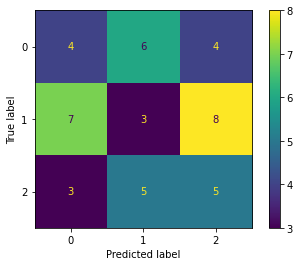

In [145]:
# On compare avec un dummy classifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf_train = dummy_clf.fit(X_train, y_train)

# Rapport de classification
predictions = dummy_clf_train.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Questions et manipulations

### Question 1 (2 points)
Dans l'exemple de régression, on observe une erreur quadratique moyenne significative lors de l'utilisation d'un algorithme de régression linéaire. Quel sont les raisons explicant l'écart de prédiction? Identifier 1 élément provenant du dataset et 1 élément provenant de l'algorithme utilisé.

algorithme : utiliser un modèle linéaire n'est pas forcément la meilleure modélisation
dataset : on obtient une erreur quadratique moyenne de 19, soit à peut près 4.5 ce qui est relativement faible devant des valeurs qui vont de 5 à 50.

In [146]:
min(boston['MEDV'])
max(boston['MEDV'])

50.0

### Question 2 (2 points)
Quelles informations pouvez-vous extraire du `classification_report` de l'exemple de classification utilisant l'algorithme KNN? Expliciter le sens des valeurs de la précision et du rappel dans le contexte de cet apprentissage (faites comme si expliquiez cela à quelqu'un qui n'est pas familier avec les termes techniques). Vous pouvez ignorer la colonne `f1-score` et les trois dernières lignes. S'il n'y a aucune erreur de prédiction, changez la valeur du `random_state` jusqu'à obtenir une erreur.

Ici la précision correspond au nombre de bonne classification sur le nombre total d'échantillon. Une bonne classification correspond à un élément qui appartient à une classe ou l'algorithme le classifie dans cette classe. dans la matrice de confusion on observe 44 bonne prédiction sur 45, on a donc une précision de 44/45, arrondie à 98%. 
Le recall correspond au nombre de fois ou la classe a été correctement identifiée, par exemple pour la classe 2 sur 13 échantillons ont été identifiées comme appartenent à la classe 2 et un échantillon a été identifié comme appartenant à la classe 1, donc il y a eu 12/13 bonne classification, 92%.

### Manipulation 1 (3 points)
Effectuer un `pair_plot` du dataset de test de iris, mais en colorant les échantillons où il y a une erreur de prédiction avec une couleur différente (créer une nouvelle classe pour les erreurs).

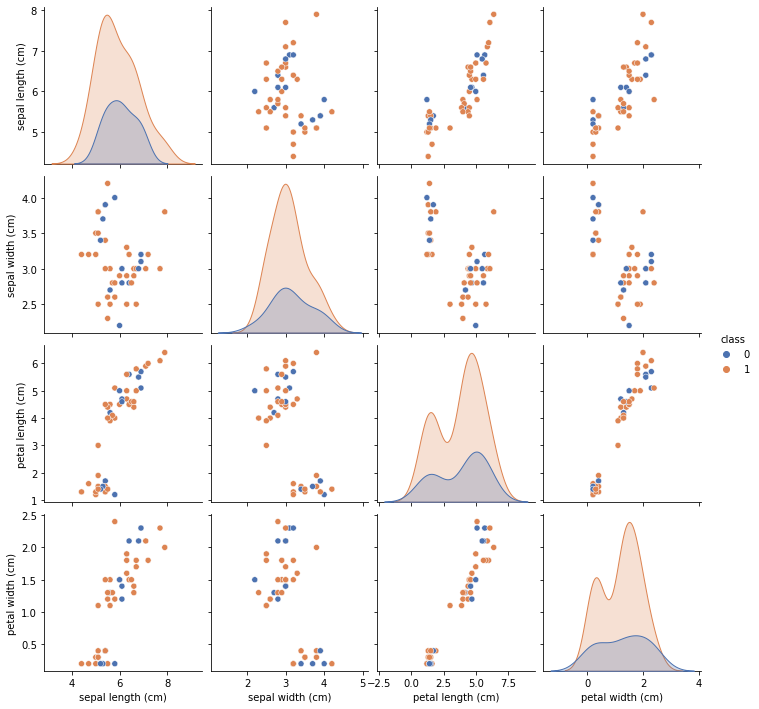

In [147]:
X_final = pd.DataFrame(columns= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'], index=[ 14,  98,  75,  16, 131,  56, 141,  44,  29, 120,  94,   5, 102,
             51,  78,  42,  92,  66,  31,  35,  90,  84,  77,  40, 125,  99,
             33,  19,  73, 146,  91, 135,  69, 128, 114,  48,  53,  28,  54,
            108, 112,  17, 119, 103,  58])
X_final.iloc[:,0:4]= X_test
for k in range (len(y_test)): 

    if (y_test.iloc[k] - predictions[k]) == 0 : 
        X_final.iloc[k,4]=0
    if (y_test.iloc[k] - predictions[k]) != 0 :     
        X_final.iloc[k,4]=1

sns.pairplot(X_final, hue="class", palette = 'deep')

### Manipulation 2 (2 points)
Utiliser un algorithme d'arbre de décision pour déterminer la variable RAD du jeu de données `boston`. Générer le rapport de classification et la matrice de confusion pour les données de tests, ainsi que pour les données d'entraînement.

In [148]:
# Faire les manipulations ici


              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89        12
           4       0.91      0.89      0.90        36
           5       1.00      0.95      0.97        37
           6       0.75      0.75      0.75         8
           7       1.00      1.00      1.00         5
           8       0.88      1.00      0.93         7
          24       1.00      1.00      1.00        37

    accuracy                           0.93       152
   macro avg       0.90      0.92      0.91       152
weighted avg       0.94      0.93      0.93       152



c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


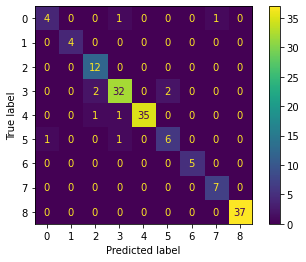

In [149]:
from sklearn.tree import DecisionTreeClassifier

# On fait la séparation des données
X_train, X_test, y_train, y_test = train_test_split(boston.drop('RAD', axis='columns'), boston['RAD'], test_size = 0.3, random_state = 1)

# On définit notre méthode de régression
clf = DecisionTreeClassifier()

# On entraîne le modèle avec les données d'entraînement
clf_train = clf.fit(X_train, y_train)

# Rapport de classification
predictions = clf_train.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Question 3 (2 points)
En regardant seulement les données d'entraînement, nous semblons avoir une entraînement parfait. Qu'est-ce qui explique que les performances soient moins bonnes dans les données de test? Pourquoi seuls les performances des données de test sont généralement utilisées?

L'algorithme s'entraine sur les données d'entrainement, c'est à dire qu'Il les apprend pour potentiellement classifier d'autres données après. Si on redonne ces mêmes données à l'algorithme il va les reconnaitre et donc les classifier parfaitement. Les performances sont moins bonnes sur des données de test car il y a une variabilité, donc elle ne vont pas parfaitement correspondre à celles sur lesquelles l'algo s'est entrainé. 

### Manipulation 3 (2 points)
Refaire l'entraînement de la manipulation 4, mais en limitant la prfondeur maximale de l'arbre de décision pour qu'il ait 1, 2 et 3 étage de moins que lors de la dernière manipulation. 

Note: `clf.tree_.max_depth` permet de trouver la profondeur d'un arbre entraîné

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       1.00      0.25      0.40         4
           3       0.65      0.92      0.76        12
           4       0.57      0.89      0.70        36
           5       1.00      0.76      0.86        37
           6       0.29      0.25      0.27         8
           7       0.00      0.00      0.00         5
           8       0.83      0.71      0.77         7
          24       1.00      1.00      1.00        37

    accuracy                           0.76       152
   macro avg       0.59      0.53      0.53       152
weighted avg       0.75      0.76      0.74       152



c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in lab

5

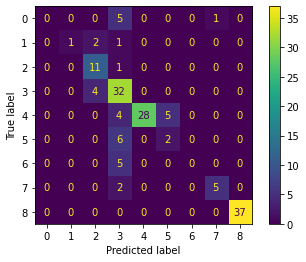

In [150]:
# Faire les manipulations ici
clf.tree_.max_depth

clf = DecisionTreeClassifier(max_depth=5)

# On entraîne le modèle avec les données d'entraînement
clf_train = clf.fit(X_train, y_train)

# Rapport de classification
predictions = clf_train.predict(X_test)
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

clf.tree_.max_depth

### Question 4 (1 point)
Un des éléments affectant le surapprentissage est la flexibilité de l'algorithme utilisé. Dans le cas des arbres de décision, plus il y a d'étages, plus l'algorithme est flexible. 

Comparer les résultats obtenus des manipulation 3 et 4. Y a-t-il surapprentissage à la manipulation 3? Pourquoi?

On peut supposer qu'il y a effectivement surapprentissage puisque la précision est similaire entre les manipulation 3 et 4. 

### Manipulation 4 (4 points)
Il est commun d'ajuster un modèle selon divers paramètres. C'est pourquoi la méthode `GridSearchCV` est implémentée dans scikit-learn. En plus de tester différents paramètres, elle utilise une technique appelée [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e) lors de l'évaluation afin de diminuer l'impact du surentraînement. 

Utiliser cette méthode afin de déterminer la profondeur optimale de l'arbre de décision utilisé aux manipulations 3 et 4 et relever les performances de la solution obtenue avec les paramètres fournis par `GridSearchCV`. Référez-vous à la documentation pour l'utilisation de cette méthode. N'oubliez pas de fixer le paramètre `random_state`!

In [151]:
# Faire les manipulations ici

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[1,2,3,4,5,6,8,10, 12, 14, 17]}
model = DecisionTreeClassifier()
exem = GridSearchCV(model, parameters)
exem.fit(X_train,y_train)

 
# print best parameter after tuning 
print(exem.best_params_) 
grid_predictions = exem.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 


c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


{'max_depth': 10}
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         6
           2       0.67      1.00      0.80         4
           3       0.75      1.00      0.86        12
           4       0.93      0.78      0.85        36
           5       0.94      0.92      0.93        37
           6       0.70      0.88      0.78         8
           7       1.00      1.00      1.00         5
           8       0.88      1.00      0.93         7
          24       1.00      1.00      1.00        37

    accuracy                           0.89       152
   macro avg       0.82      0.88      0.84       152
weighted avg       0.90      0.89      0.89       152



c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


### Question 5 (2 points)
Est-ce les résultats de la manipulation 4 correspondent aux résultats de la manipulation 3? Expliquer les différences s'il y a lieu.

Oui, effectivement on s'arrête non pas à 17 mais avant pour éviter un phénomène de surentrainement. 